In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 60.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.1
    Uninstalling tokenizers-0.15.1:
      Successfully uninstalled tokenizers-0.15.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 44 texts from ECHR (automatic translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-manual-train.tsv', column_delimiter=' ',
                                    dev_file='ES-manual-dev.tsv',
                                    test_file='ES-manual-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-02-07 16:47:40,404 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-02-07 16:47:40,406 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-train.tsv
2024-02-07 16:47:40,407 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-dev.tsv
2024-02-07 16:47:40,409 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1245,
        "number_of_documents_per_class": {
            "CODE": 72,
            "LOC": 318,
            "NATIONALITY": 73,
            "PER": 133,
            "DATE": 600,
            "LEGAL_PROFESSIONAL": 141,
            "ORG": 113,
            "QUANTITY": 162,
            "CURRENCY": 24,
            "ETHNIC_CATEGORY": 21,
            "TIME": 3
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 34924,
            "min": 1,


In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-02-07 16:47:56,912 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-02-07 16:47:57,582 Computing label dictionary. Progress:


1245it [00:00, 47631.68it/s]

2024-02-07 16:47:57,614 Dictionary created for label 'ner' with 12 values: DATE (seen 600 times), LOC (seen 318 times), QUANTITY (seen 162 times), LEGAL_PROFESSIONAL (seen 141 times), PER (seen 133 times), ORG (seen 113 times), NATIONALITY (seen 73 times), CODE (seen 72 times), CURRENCY (seen 24 times), ETHNIC_CATEGORY (seen 21 times), TIME (seen 3 times)
[b'<unk>', b'DATE', b'LOC', b'QUANTITY', b'LEGAL_PROFESSIONAL', b'PER', b'ORG', b'NATIONALITY', b'CODE', b'CURRENCY', b'ETHNIC_CATEGORY', b'TIME']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-02-07 16:47:57,631 SequenceTagger predicts: Dictionary with 45 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=18,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-02-07 16:47:58,249 ----------------------------------------------------------------------------------------------------
2024-02-07 16:47:58,251 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

2024-02-07 16:48:28,516 Evaluating as a multi-label problem: False
2024-02-07 16:48:28,535 DEV : loss 0.448638379573822 - f1-score (micro avg)  0.3352
2024-02-07 16:48:28,557 BAD EPOCHS (no improvement): 0
2024-02-07 16:48:28,561 saving best model


2024-02-07 16:48:33,778 ----------------------------------------------------------------------------------------------------
2024-02-07 16:48:34,343 epoch 2 - iter 3/39 - loss 0.51687644 - time (sec): 0.56 - samples/sec: 4671.98 - lr: 0.100000
2024-02-07 16:48:37,972 epoch 2 - iter 6/39 - loss 0.59806082 - time (sec): 4.19 - samples/sec: 1284.35 - lr: 0.100000
2024-02-07 16:48:39,473 epoch 2 - iter 9/39 - loss 0.61177162 - time (sec): 5.69 - samples/sec: 1411.44 - lr: 0.100000
2024-02-07 16:48:40,997 epoch 2 - iter 12/39 - loss 0.58015232 - time (sec): 7.22 - samples/sec: 1476.46 - lr: 0.100000
2024-02-07 16:48:42,487 epoch 2 - iter 15/39 - loss 0.52822555 - time (sec): 8.71 - samples/sec: 1526.78 - lr: 0.100000
2024-02-07 16:48:44,949 epoch 2 - iter 18/39 - loss 0.55264602 - time (sec): 11.17 - samples/sec: 1466.00 - lr: 0.100000
2024-02-07 16:48:46,430 epoch 2 - iter 21/39 - loss 0.53519581 - time (sec): 12.65 - samples/sec: 1485.84 - lr: 0.100000
2024-02-07 16:48:48,049 epoch 2 - it

100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

2024-02-07 16:48:58,204 Evaluating as a multi-label problem: False
2024-02-07 16:48:58,220 DEV : loss 0.2560358941555023 - f1-score (micro avg)  0.5181
2024-02-07 16:48:58,244 BAD EPOCHS (no improvement): 0
2024-02-07 16:48:58,251 saving best model


2024-02-07 16:49:03,788 ----------------------------------------------------------------------------------------------------
2024-02-07 16:49:04,782 epoch 3 - iter 3/39 - loss 0.44620088 - time (sec): 0.95 - samples/sec: 2980.70 - lr: 0.100000
2024-02-07 16:49:07,920 epoch 3 - iter 6/39 - loss 0.36174494 - time (sec): 4.09 - samples/sec: 1327.10 - lr: 0.100000
2024-02-07 16:49:09,453 epoch 3 - iter 9/39 - loss 0.34520463 - time (sec): 5.63 - samples/sec: 1478.65 - lr: 0.100000
2024-02-07 16:49:10,894 epoch 3 - iter 12/39 - loss 0.36374710 - time (sec): 7.07 - samples/sec: 1559.00 - lr: 0.100000
2024-02-07 16:49:13,218 epoch 3 - iter 15/39 - loss 0.41089535 - time (sec): 9.39 - samples/sec: 1522.42 - lr: 0.100000
2024-02-07 16:49:14,728 epoch 3 - iter 18/39 - loss 0.39702735 - time (sec): 10.90 - samples/sec: 1566.08 - lr: 0.100000
2024-02-07 16:49:16,239 epoch 3 - iter 21/39 - loss 0.39011769 - time (sec): 12.41 - samples/sec: 1581.80 - lr: 0.100000
2024-02-07 16:49:17,739 epoch 3 - it

100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

2024-02-07 16:49:27,871 Evaluating as a multi-label problem: False
2024-02-07 16:49:27,885 DEV : loss 0.18758757412433624 - f1-score (micro avg)  0.605
2024-02-07 16:49:27,912 BAD EPOCHS (no improvement): 0
2024-02-07 16:49:27,917 saving best model


2024-02-07 16:49:33,869 ----------------------------------------------------------------------------------------------------
2024-02-07 16:49:34,490 epoch 4 - iter 3/39 - loss 0.27069395 - time (sec): 0.62 - samples/sec: 4878.13 - lr: 0.100000
2024-02-07 16:49:37,297 epoch 4 - iter 6/39 - loss 0.28178940 - time (sec): 3.43 - samples/sec: 1589.14 - lr: 0.100000
2024-02-07 16:49:39,598 epoch 4 - iter 9/39 - loss 0.33935072 - time (sec): 5.73 - samples/sec: 1508.32 - lr: 0.100000
2024-02-07 16:49:41,174 epoch 4 - iter 12/39 - loss 0.32292731 - time (sec): 7.30 - samples/sec: 1517.84 - lr: 0.100000
2024-02-07 16:49:43,012 epoch 4 - iter 15/39 - loss 0.30737188 - time (sec): 9.14 - samples/sec: 1493.99 - lr: 0.100000
2024-02-07 16:49:44,533 epoch 4 - iter 18/39 - loss 0.29361006 - time (sec): 10.66 - samples/sec: 1527.21 - lr: 0.100000
2024-02-07 16:49:46,055 epoch 4 - iter 21/39 - loss 0.28101391 - time (sec): 12.18 - samples/sec: 1561.13 - lr: 0.100000
2024-02-07 16:49:47,562 epoch 4 - it

100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

2024-02-07 16:49:57,588 Evaluating as a multi-label problem: False
2024-02-07 16:49:57,604 DEV : loss 0.16476482152938843 - f1-score (micro avg)  0.6344
2024-02-07 16:49:57,625 BAD EPOCHS (no improvement): 0
2024-02-07 16:49:57,631 saving best model


2024-02-07 16:50:03,226 ----------------------------------------------------------------------------------------------------
2024-02-07 16:50:03,725 epoch 5 - iter 3/39 - loss 0.24688567 - time (sec): 0.50 - samples/sec: 4805.95 - lr: 0.100000
2024-02-07 16:50:07,187 epoch 5 - iter 6/39 - loss 0.24581137 - time (sec): 3.96 - samples/sec: 1216.06 - lr: 0.100000
2024-02-07 16:50:08,687 epoch 5 - iter 9/39 - loss 0.22728487 - time (sec): 5.46 - samples/sec: 1347.97 - lr: 0.100000
2024-02-07 16:50:10,421 epoch 5 - iter 12/39 - loss 0.22230633 - time (sec): 7.19 - samples/sec: 1460.54 - lr: 0.100000
2024-02-07 16:50:11,892 epoch 5 - iter 15/39 - loss 0.21132125 - time (sec): 8.66 - samples/sec: 1503.18 - lr: 0.100000
2024-02-07 16:50:13,558 epoch 5 - iter 18/39 - loss 0.20410232 - time (sec): 10.33 - samples/sec: 1558.72 - lr: 0.100000
2024-02-07 16:50:15,180 epoch 5 - iter 21/39 - loss 0.21170791 - time (sec): 11.95 - samples/sec: 1583.18 - lr: 0.100000
2024-02-07 16:50:16,616 epoch 5 - it

100%|██████████| 6/6 [00:01<00:00,  4.14it/s]

2024-02-07 16:50:27,731 Evaluating as a multi-label problem: False
2024-02-07 16:50:27,745 DEV : loss 0.13743095099925995 - f1-score (micro avg)  0.6923
2024-02-07 16:50:27,767 BAD EPOCHS (no improvement): 0
2024-02-07 16:50:27,771 saving best model


2024-02-07 16:50:33,536 ----------------------------------------------------------------------------------------------------
2024-02-07 16:50:33,989 epoch 6 - iter 3/39 - loss 0.13562867 - time (sec): 0.45 - samples/sec: 4906.01 - lr: 0.100000
2024-02-07 16:50:37,647 epoch 6 - iter 6/39 - loss 0.18452109 - time (sec): 4.11 - samples/sec: 1170.83 - lr: 0.100000
2024-02-07 16:50:39,128 epoch 6 - iter 9/39 - loss 0.17813112 - time (sec): 5.59 - samples/sec: 1309.35 - lr: 0.100000
2024-02-07 16:50:40,659 epoch 6 - iter 12/39 - loss 0.18566157 - time (sec): 7.12 - samples/sec: 1436.65 - lr: 0.100000
2024-02-07 16:50:42,175 epoch 6 - iter 15/39 - loss 0.18101971 - time (sec): 8.64 - samples/sec: 1506.79 - lr: 0.100000
2024-02-07 16:50:43,795 epoch 6 - iter 18/39 - loss 0.18297646 - time (sec): 10.26 - samples/sec: 1545.37 - lr: 0.100000
2024-02-07 16:50:45,427 epoch 6 - iter 21/39 - loss 0.18316670 - time (sec): 11.89 - samples/sec: 1548.79 - lr: 0.100000
2024-02-07 16:50:46,981 epoch 6 - it

100%|██████████| 6/6 [00:01<00:00,  4.21it/s]

2024-02-07 16:50:58,298 Evaluating as a multi-label problem: False
2024-02-07 16:50:58,316 DEV : loss 0.1035715639591217 - f1-score (micro avg)  0.7573
2024-02-07 16:50:58,340 BAD EPOCHS (no improvement): 0
2024-02-07 16:50:58,345 saving best model


2024-02-07 16:51:03,857 ----------------------------------------------------------------------------------------------------
2024-02-07 16:51:04,466 epoch 7 - iter 3/39 - loss 0.20931401 - time (sec): 0.57 - samples/sec: 4257.64 - lr: 0.100000
2024-02-07 16:51:09,001 epoch 7 - iter 6/39 - loss 0.23765260 - time (sec): 5.10 - samples/sec: 1135.03 - lr: 0.100000
2024-02-07 16:51:10,518 epoch 7 - iter 9/39 - loss 0.19660044 - time (sec): 6.62 - samples/sec: 1276.40 - lr: 0.100000
2024-02-07 16:51:12,102 epoch 7 - iter 12/39 - loss 0.18501041 - time (sec): 8.20 - samples/sec: 1357.58 - lr: 0.100000
2024-02-07 16:51:13,662 epoch 7 - iter 15/39 - loss 0.17147086 - time (sec): 9.76 - samples/sec: 1397.84 - lr: 0.100000
2024-02-07 16:51:15,201 epoch 7 - iter 18/39 - loss 0.16367931 - time (sec): 11.30 - samples/sec: 1428.91 - lr: 0.100000
2024-02-07 16:51:16,818 epoch 7 - iter 21/39 - loss 0.17312308 - time (sec): 12.92 - samples/sec: 1447.26 - lr: 0.100000
2024-02-07 16:51:18,504 epoch 7 - it

100%|██████████| 6/6 [00:01<00:00,  4.17it/s]

2024-02-07 16:51:28,736 Evaluating as a multi-label problem: False
2024-02-07 16:51:28,749 DEV : loss 0.1015157625079155 - f1-score (micro avg)  0.8155
2024-02-07 16:51:28,770 BAD EPOCHS (no improvement): 0
2024-02-07 16:51:28,775 saving best model


2024-02-07 16:51:34,413 ----------------------------------------------------------------------------------------------------
2024-02-07 16:51:34,935 epoch 8 - iter 3/39 - loss 0.12130349 - time (sec): 0.52 - samples/sec: 5057.67 - lr: 0.100000
2024-02-07 16:51:38,629 epoch 8 - iter 6/39 - loss 0.14748876 - time (sec): 4.21 - samples/sec: 1299.51 - lr: 0.100000
2024-02-07 16:51:40,117 epoch 8 - iter 9/39 - loss 0.14203117 - time (sec): 5.70 - samples/sec: 1428.81 - lr: 0.100000
2024-02-07 16:51:41,599 epoch 8 - iter 12/39 - loss 0.14201910 - time (sec): 7.18 - samples/sec: 1495.06 - lr: 0.100000
2024-02-07 16:51:43,183 epoch 8 - iter 15/39 - loss 0.14192650 - time (sec): 8.77 - samples/sec: 1522.08 - lr: 0.100000
2024-02-07 16:51:44,593 epoch 8 - iter 18/39 - loss 0.13787249 - time (sec): 10.18 - samples/sec: 1540.72 - lr: 0.100000
2024-02-07 16:51:46,216 epoch 8 - iter 21/39 - loss 0.13919291 - time (sec): 11.80 - samples/sec: 1584.12 - lr: 0.100000
2024-02-07 16:51:47,805 epoch 8 - it

100%|██████████| 6/6 [00:01<00:00,  4.17it/s]

2024-02-07 16:51:58,875 Evaluating as a multi-label problem: False
2024-02-07 16:51:58,891 DEV : loss 0.09120630472898483 - f1-score (micro avg)  0.8168
2024-02-07 16:51:58,913 BAD EPOCHS (no improvement): 0
2024-02-07 16:51:58,919 saving best model


2024-02-07 16:52:04,614 ----------------------------------------------------------------------------------------------------
2024-02-07 16:52:05,156 epoch 9 - iter 3/39 - loss 0.15177797 - time (sec): 0.54 - samples/sec: 4773.72 - lr: 0.100000
2024-02-07 16:52:08,424 epoch 9 - iter 6/39 - loss 0.15704118 - time (sec): 3.81 - samples/sec: 1384.54 - lr: 0.100000
2024-02-07 16:52:09,885 epoch 9 - iter 9/39 - loss 0.14165764 - time (sec): 5.27 - samples/sec: 1526.71 - lr: 0.100000
2024-02-07 16:52:12,366 epoch 9 - iter 12/39 - loss 0.17120507 - time (sec): 7.75 - samples/sec: 1467.83 - lr: 0.100000
2024-02-07 16:52:13,841 epoch 9 - iter 15/39 - loss 0.16015180 - time (sec): 9.23 - samples/sec: 1522.89 - lr: 0.100000
2024-02-07 16:52:15,288 epoch 9 - iter 18/39 - loss 0.15253769 - time (sec): 10.67 - samples/sec: 1542.91 - lr: 0.100000
2024-02-07 16:52:16,799 epoch 9 - iter 21/39 - loss 0.14796663 - time (sec): 12.18 - samples/sec: 1547.05 - lr: 0.100000
2024-02-07 16:52:18,329 epoch 9 - it

100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

2024-02-07 16:52:28,767 Evaluating as a multi-label problem: False
2024-02-07 16:52:28,787 DEV : loss 0.07025386393070221 - f1-score (micro avg)  0.8346
2024-02-07 16:52:28,811 BAD EPOCHS (no improvement): 0
2024-02-07 16:52:28,817 saving best model


2024-02-07 16:52:35,138 ----------------------------------------------------------------------------------------------------
2024-02-07 16:52:35,760 epoch 10 - iter 3/39 - loss 0.08893793 - time (sec): 0.62 - samples/sec: 4224.45 - lr: 0.100000
2024-02-07 16:52:38,703 epoch 10 - iter 6/39 - loss 0.12036070 - time (sec): 3.56 - samples/sec: 1535.96 - lr: 0.100000
2024-02-07 16:52:40,279 epoch 10 - iter 9/39 - loss 0.11616714 - time (sec): 5.14 - samples/sec: 1594.67 - lr: 0.100000
2024-02-07 16:52:42,614 epoch 10 - iter 12/39 - loss 0.15131464 - time (sec): 7.47 - samples/sec: 1520.48 - lr: 0.100000
2024-02-07 16:52:44,191 epoch 10 - iter 15/39 - loss 0.14084297 - time (sec): 9.05 - samples/sec: 1554.11 - lr: 0.100000
2024-02-07 16:52:45,684 epoch 10 - iter 18/39 - loss 0.14107090 - time (sec): 10.54 - samples/sec: 1566.88 - lr: 0.100000
2024-02-07 16:52:47,164 epoch 10 - iter 21/39 - loss 0.13451540 - time (sec): 12.02 - samples/sec: 1591.74 - lr: 0.100000
2024-02-07 16:52:48,674 epoch

100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

2024-02-07 16:52:58,741 Evaluating as a multi-label problem: False
2024-02-07 16:52:58,756 DEV : loss 0.06200587749481201 - f1-score (micro avg)  0.8687
2024-02-07 16:52:58,777 BAD EPOCHS (no improvement): 0
2024-02-07 16:52:58,781 saving best model


2024-02-07 16:53:04,492 ----------------------------------------------------------------------------------------------------
2024-02-07 16:53:05,967 epoch 11 - iter 3/39 - loss 0.22311811 - time (sec): 1.47 - samples/sec: 2407.90 - lr: 0.100000
2024-02-07 16:53:08,267 epoch 11 - iter 6/39 - loss 0.17045739 - time (sec): 3.77 - samples/sec: 1611.09 - lr: 0.100000
2024-02-07 16:53:09,701 epoch 11 - iter 9/39 - loss 0.16467360 - time (sec): 5.21 - samples/sec: 1650.65 - lr: 0.100000
2024-02-07 16:53:11,094 epoch 11 - iter 12/39 - loss 0.15455895 - time (sec): 6.60 - samples/sec: 1680.73 - lr: 0.100000
2024-02-07 16:53:12,941 epoch 11 - iter 15/39 - loss 0.14937560 - time (sec): 8.45 - samples/sec: 1624.79 - lr: 0.100000
2024-02-07 16:53:14,484 epoch 11 - iter 18/39 - loss 0.14313918 - time (sec): 9.99 - samples/sec: 1646.79 - lr: 0.100000
2024-02-07 16:53:16,045 epoch 11 - iter 21/39 - loss 0.13475970 - time (sec): 11.55 - samples/sec: 1662.95 - lr: 0.100000
2024-02-07 16:53:17,585 epoch 

100%|██████████| 6/6 [00:01<00:00,  4.14it/s]

2024-02-07 16:53:27,536 Evaluating as a multi-label problem: False
2024-02-07 16:53:27,556 DEV : loss 0.06790448725223541 - f1-score (micro avg)  0.8738
2024-02-07 16:53:27,583 BAD EPOCHS (no improvement): 0
2024-02-07 16:53:27,588 saving best model


2024-02-07 16:53:33,207 ----------------------------------------------------------------------------------------------------
2024-02-07 16:53:33,797 epoch 12 - iter 3/39 - loss 0.06935890 - time (sec): 0.59 - samples/sec: 4480.81 - lr: 0.100000
2024-02-07 16:53:37,369 epoch 12 - iter 6/39 - loss 0.07579088 - time (sec): 4.16 - samples/sec: 1267.88 - lr: 0.100000
2024-02-07 16:53:39,748 epoch 12 - iter 9/39 - loss 0.13709723 - time (sec): 6.54 - samples/sec: 1296.22 - lr: 0.100000
2024-02-07 16:53:41,298 epoch 12 - iter 12/39 - loss 0.12304298 - time (sec): 8.09 - samples/sec: 1425.52 - lr: 0.100000
2024-02-07 16:53:42,804 epoch 12 - iter 15/39 - loss 0.11388049 - time (sec): 9.60 - samples/sec: 1468.40 - lr: 0.100000
2024-02-07 16:53:44,455 epoch 12 - iter 18/39 - loss 0.12095599 - time (sec): 11.25 - samples/sec: 1506.49 - lr: 0.100000
2024-02-07 16:53:45,972 epoch 12 - iter 21/39 - loss 0.11689470 - time (sec): 12.76 - samples/sec: 1532.60 - lr: 0.100000
2024-02-07 16:53:47,372 epoch

100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

2024-02-07 16:53:57,070 Evaluating as a multi-label problem: False
2024-02-07 16:53:57,088 DEV : loss 0.0610131099820137 - f1-score (micro avg)  0.8608
2024-02-07 16:53:57,115 BAD EPOCHS (no improvement): 1
2024-02-07 16:53:57,120 ----------------------------------------------------------------------------------------------------


2024-02-07 16:53:57,634 epoch 13 - iter 3/39 - loss 0.04985154 - time (sec): 0.51 - samples/sec: 4716.83 - lr: 0.100000
2024-02-07 16:53:59,046 epoch 13 - iter 6/39 - loss 0.06465732 - time (sec): 1.92 - samples/sec: 2486.52 - lr: 0.100000
2024-02-07 16:54:01,862 epoch 13 - iter 9/39 - loss 0.13743277 - time (sec): 4.74 - samples/sec: 1710.13 - lr: 0.100000
2024-02-07 16:54:03,580 epoch 13 - iter 12/39 - loss 0.13222185 - time (sec): 6.46 - samples/sec: 1659.65 - lr: 0.100000
2024-02-07 16:54:05,159 epoch 13 - iter 15/39 - loss 0.13135462 - time (sec): 8.04 - samples/sec: 1665.26 - lr: 0.100000
2024-02-07 16:54:06,723 epoch 13 - iter 18/39 - loss 0.11565461 - time (sec): 9.60 - samples/sec: 1694.24 - lr: 0.100000
2024-02-07 16:54:08,412 epoch 13 - iter 21/39 - loss 0.11663084 - time (sec): 11.29 - samples/sec: 1691.21 - lr: 0.100000
2024-02-07 16:54:09,952 epoch 13 - iter 24/39 - loss 0.11007873 - time (sec): 12.83 - samples/sec: 1713.76 - lr: 0.100000
2024-02-07 16:54:11,502 epoch 13 

100%|██████████| 6/6 [00:01<00:00,  4.46it/s]

2024-02-07 16:54:19,650 Evaluating as a multi-label problem: False
2024-02-07 16:54:19,664 DEV : loss 0.05322893708944321 - f1-score (micro avg)  0.8613
2024-02-07 16:54:19,684 BAD EPOCHS (no improvement): 2
2024-02-07 16:54:19,689 ----------------------------------------------------------------------------------------------------


2024-02-07 16:54:20,259 epoch 14 - iter 3/39 - loss 0.07547368 - time (sec): 0.57 - samples/sec: 4882.17 - lr: 0.100000
2024-02-07 16:54:21,812 epoch 14 - iter 6/39 - loss 0.07370914 - time (sec): 2.12 - samples/sec: 2557.02 - lr: 0.100000
2024-02-07 16:54:23,268 epoch 14 - iter 9/39 - loss 0.07510884 - time (sec): 3.58 - samples/sec: 2231.83 - lr: 0.100000
2024-02-07 16:54:24,718 epoch 14 - iter 12/39 - loss 0.07930087 - time (sec): 5.03 - samples/sec: 2159.74 - lr: 0.100000
2024-02-07 16:54:26,176 epoch 14 - iter 15/39 - loss 0.07544263 - time (sec): 6.49 - samples/sec: 2075.64 - lr: 0.100000
2024-02-07 16:54:27,719 epoch 14 - iter 18/39 - loss 0.08264200 - time (sec): 8.03 - samples/sec: 2008.79 - lr: 0.100000
2024-02-07 16:54:29,287 epoch 14 - iter 21/39 - loss 0.07995048 - time (sec): 9.60 - samples/sec: 1977.19 - lr: 0.100000
2024-02-07 16:54:30,724 epoch 14 - iter 24/39 - loss 0.07851728 - time (sec): 11.03 - samples/sec: 1943.48 - lr: 0.100000
2024-02-07 16:54:32,144 epoch 14 -

100%|██████████| 6/6 [00:01<00:00,  4.42it/s]

2024-02-07 16:54:41,132 Evaluating as a multi-label problem: False
2024-02-07 16:54:41,145 DEV : loss 0.04776547849178314 - f1-score (micro avg)  0.89
2024-02-07 16:54:41,166 BAD EPOCHS (no improvement): 0
2024-02-07 16:54:41,171 saving best model


2024-02-07 16:54:46,653 ----------------------------------------------------------------------------------------------------
2024-02-07 16:54:47,284 epoch 15 - iter 3/39 - loss 0.05486452 - time (sec): 0.63 - samples/sec: 4466.55 - lr: 0.100000
2024-02-07 16:54:50,843 epoch 15 - iter 6/39 - loss 0.06085410 - time (sec): 4.19 - samples/sec: 1350.94 - lr: 0.100000
2024-02-07 16:54:52,274 epoch 15 - iter 9/39 - loss 0.06367150 - time (sec): 5.62 - samples/sec: 1475.73 - lr: 0.100000
2024-02-07 16:54:53,767 epoch 15 - iter 12/39 - loss 0.06134637 - time (sec): 7.11 - samples/sec: 1514.88 - lr: 0.100000
2024-02-07 16:54:55,331 epoch 15 - iter 15/39 - loss 0.06377311 - time (sec): 8.68 - samples/sec: 1537.85 - lr: 0.100000
2024-02-07 16:54:56,823 epoch 15 - iter 18/39 - loss 0.06512685 - time (sec): 10.17 - samples/sec: 1563.14 - lr: 0.100000
2024-02-07 16:54:58,519 epoch 15 - iter 21/39 - loss 0.06810411 - time (sec): 11.86 - samples/sec: 1574.19 - lr: 0.100000
2024-02-07 16:55:00,209 epoch

100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

2024-02-07 16:55:11,519 Evaluating as a multi-label problem: False
2024-02-07 16:55:11,533 DEV : loss 0.05466997250914574 - f1-score (micro avg)  0.878
2024-02-07 16:55:11,558 BAD EPOCHS (no improvement): 1
2024-02-07 16:55:11,563 ----------------------------------------------------------------------------------------------------


2024-02-07 16:55:12,202 epoch 16 - iter 3/39 - loss 0.09321500 - time (sec): 0.64 - samples/sec: 4244.28 - lr: 0.100000
2024-02-07 16:55:13,827 epoch 16 - iter 6/39 - loss 0.07176485 - time (sec): 2.26 - samples/sec: 2314.77 - lr: 0.100000
2024-02-07 16:55:15,514 epoch 16 - iter 9/39 - loss 0.07000267 - time (sec): 3.95 - samples/sec: 2006.90 - lr: 0.100000
2024-02-07 16:55:17,822 epoch 16 - iter 12/39 - loss 0.09231705 - time (sec): 6.26 - samples/sec: 1739.38 - lr: 0.100000
2024-02-07 16:55:19,272 epoch 16 - iter 15/39 - loss 0.09202911 - time (sec): 7.71 - samples/sec: 1768.87 - lr: 0.100000
2024-02-07 16:55:20,678 epoch 16 - iter 18/39 - loss 0.08601692 - time (sec): 9.11 - samples/sec: 1757.34 - lr: 0.100000
2024-02-07 16:55:22,146 epoch 16 - iter 21/39 - loss 0.08139588 - time (sec): 10.58 - samples/sec: 1765.87 - lr: 0.100000
2024-02-07 16:55:23,606 epoch 16 - iter 24/39 - loss 0.07763180 - time (sec): 12.04 - samples/sec: 1780.45 - lr: 0.100000
2024-02-07 16:55:25,057 epoch 16 

100%|██████████| 6/6 [00:01<00:00,  3.51it/s]

2024-02-07 16:55:33,636 Evaluating as a multi-label problem: False
2024-02-07 16:55:33,649 DEV : loss 0.047276537865400314 - f1-score (micro avg)  0.8959
2024-02-07 16:55:33,671 BAD EPOCHS (no improvement): 0
2024-02-07 16:55:33,687 saving best model


2024-02-07 16:55:39,155 ----------------------------------------------------------------------------------------------------
2024-02-07 16:55:39,674 epoch 17 - iter 3/39 - loss 0.06279108 - time (sec): 0.52 - samples/sec: 4904.57 - lr: 0.100000
2024-02-07 16:55:44,216 epoch 17 - iter 6/39 - loss 0.12069492 - time (sec): 5.06 - samples/sec: 1142.78 - lr: 0.100000
2024-02-07 16:55:45,636 epoch 17 - iter 9/39 - loss 0.10703328 - time (sec): 6.48 - samples/sec: 1259.60 - lr: 0.100000
2024-02-07 16:55:47,057 epoch 17 - iter 12/39 - loss 0.09597363 - time (sec): 7.90 - samples/sec: 1375.21 - lr: 0.100000
2024-02-07 16:55:48,700 epoch 17 - iter 15/39 - loss 0.08549906 - time (sec): 9.54 - samples/sec: 1437.35 - lr: 0.100000
2024-02-07 16:55:50,299 epoch 17 - iter 18/39 - loss 0.07868229 - time (sec): 11.14 - samples/sec: 1463.84 - lr: 0.100000
2024-02-07 16:55:51,799 epoch 17 - iter 21/39 - loss 0.07494427 - time (sec): 12.64 - samples/sec: 1504.39 - lr: 0.100000
2024-02-07 16:55:53,318 epoch

100%|██████████| 6/6 [00:01<00:00,  4.19it/s]

2024-02-07 16:56:03,607 Evaluating as a multi-label problem: False
2024-02-07 16:56:03,621 DEV : loss 0.045174721628427505 - f1-score (micro avg)  0.9069
2024-02-07 16:56:03,643 BAD EPOCHS (no improvement): 0
2024-02-07 16:56:03,648 saving best model


2024-02-07 16:56:09,273 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:09,860 epoch 18 - iter 3/39 - loss 0.06520970 - time (sec): 0.58 - samples/sec: 4494.64 - lr: 0.100000
2024-02-07 16:56:12,882 epoch 18 - iter 6/39 - loss 0.05228642 - time (sec): 3.61 - samples/sec: 1429.82 - lr: 0.100000
2024-02-07 16:56:14,443 epoch 18 - iter 9/39 - loss 0.06350843 - time (sec): 5.17 - samples/sec: 1524.03 - lr: 0.100000
2024-02-07 16:56:16,820 epoch 18 - iter 12/39 - loss 0.09166507 - time (sec): 7.55 - samples/sec: 1479.90 - lr: 0.100000
2024-02-07 16:56:18,350 epoch 18 - iter 15/39 - loss 0.08577476 - time (sec): 9.08 - samples/sec: 1528.71 - lr: 0.100000
2024-02-07 16:56:19,929 epoch 18 - iter 18/39 - loss 0.08003008 - time (sec): 10.65 - samples/sec: 1539.60 - lr: 0.100000
2024-02-07 16:56:21,489 epoch 18 - iter 21/39 - loss 0.07836910 - time (sec): 12.21 - samples/sec: 1546.31 - lr: 0.100000
2024-02-07 16:56:23,100 epoch

100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

2024-02-07 16:56:33,899 Evaluating as a multi-label problem: False
2024-02-07 16:56:33,913 DEV : loss 0.06228771060705185 - f1-score (micro avg)  0.87
2024-02-07 16:56:33,934 BAD EPOCHS (no improvement): 1


2024-02-07 16:56:39,309 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:44,903 SequenceTagger predicts: Dictionary with 47 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, <START>, <STOP>


100%|██████████| 7/7 [00:01<00:00,  4.37it/s]

2024-02-07 16:56:47,240 Evaluating as a multi-label problem: False
2024-02-07 16:56:47,254 0.8131	0.7898	0.8013	0.6966
2024-02-07 16:56:47,255 
Results:
- F-score (micro) 0.8013
- F-score (macro) 0.5812
- Accuracy 0.6966

By class:
                    precision    recall  f1-score   support

              DATE     1.0000    0.9670    0.9832        91
               LOC     0.8636    0.8837    0.8736        86
               PER     0.7561    0.6078    0.6739        51
LEGAL_PROFESSIONAL     0.3714    0.6190    0.4643        21
          QUANTITY     0.7500    0.7500    0.7500        20
       NATIONALITY     1.0000    0.7368    0.8485        19
               ORG     0.2500    0.1667    0.2000        12
              CODE     1.0000    1.0000    1.0000         6
          CURRENCY     0.6000    0.6000    0.6000         5
              TIME     0.0000    0.0000    0.0000         2
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         1

         micro avg     0.8131    0.7898    0.8

{'test_score': 0.8012924071082392,
 'dev_score_history': [0.33519553072625696,
  0.5180722891566266,
  0.605,
  0.6344086021505375,
  0.6923076923076923,
  0.7572815533980582,
  0.8154897494305239,
  0.8168316831683168,
  0.8345679012345679,
  0.8687350835322196,
  0.8737864077669903,
  0.8607594936708861,
  0.8613138686131386,
  0.8899521531100478,
  0.8780487804878049,
  0.8958837772397094,
  0.9069212410501193,
  0.8699999999999999],
 'train_loss_history': [0.9521123379069552,
  0.47239294107830576,
  0.35081855757323044,
  0.27144869484451956,
  0.22416362471903276,
  0.19057560982866367,
  0.16795534197919051,
  0.14190413077772449,
  0.1339872747116954,
  0.12410023651804633,
  0.1176865468141536,
  0.10703509764059099,
  0.09822025371163097,
  0.09142797966208768,
  0.08033879146503838,
  0.07378555488346122,
  0.07267506596914013,
  0.07179695944676297],
 'dev_loss_history': [0.448638379573822,
  0.2560358941555023,
  0.18758757412433624,
  0.16476482152938843,
  0.137430950999

2024-02-07 16:56:47,273 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:47,274 WARNING: No LOSS found for test split in this data.
2024-02-07 16:56:47,276 Are you sure you want to plot LOSS and not another value?
2024-02-07 16:56:47,277 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:47,706 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:47,708 WARNING: No F1 found for test split in this data.
2024-02-07 16:56:47,709 Are you sure you want to plot F1 and not another value?
2024-02-07 16:56:47,710 ----------------------------------------------------------------------------------------------------
2024-02-07 16:56:48,799 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/flair-ES-same-order/training.png


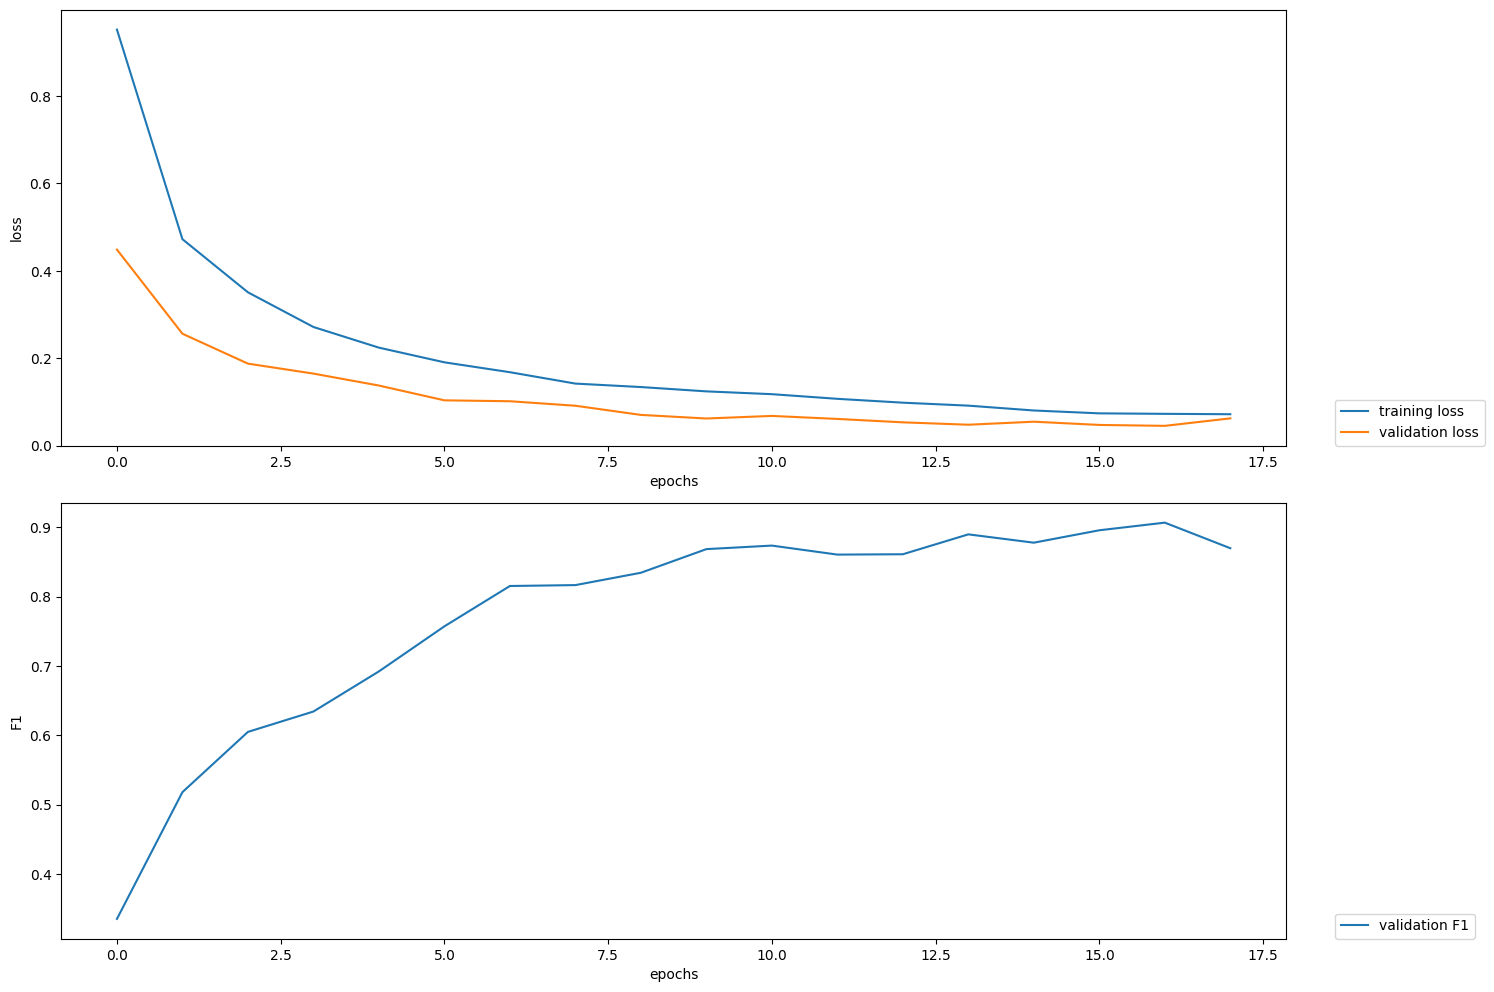

2024-02-07 16:56:52,360 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/flair-ES-same-order/weights.png


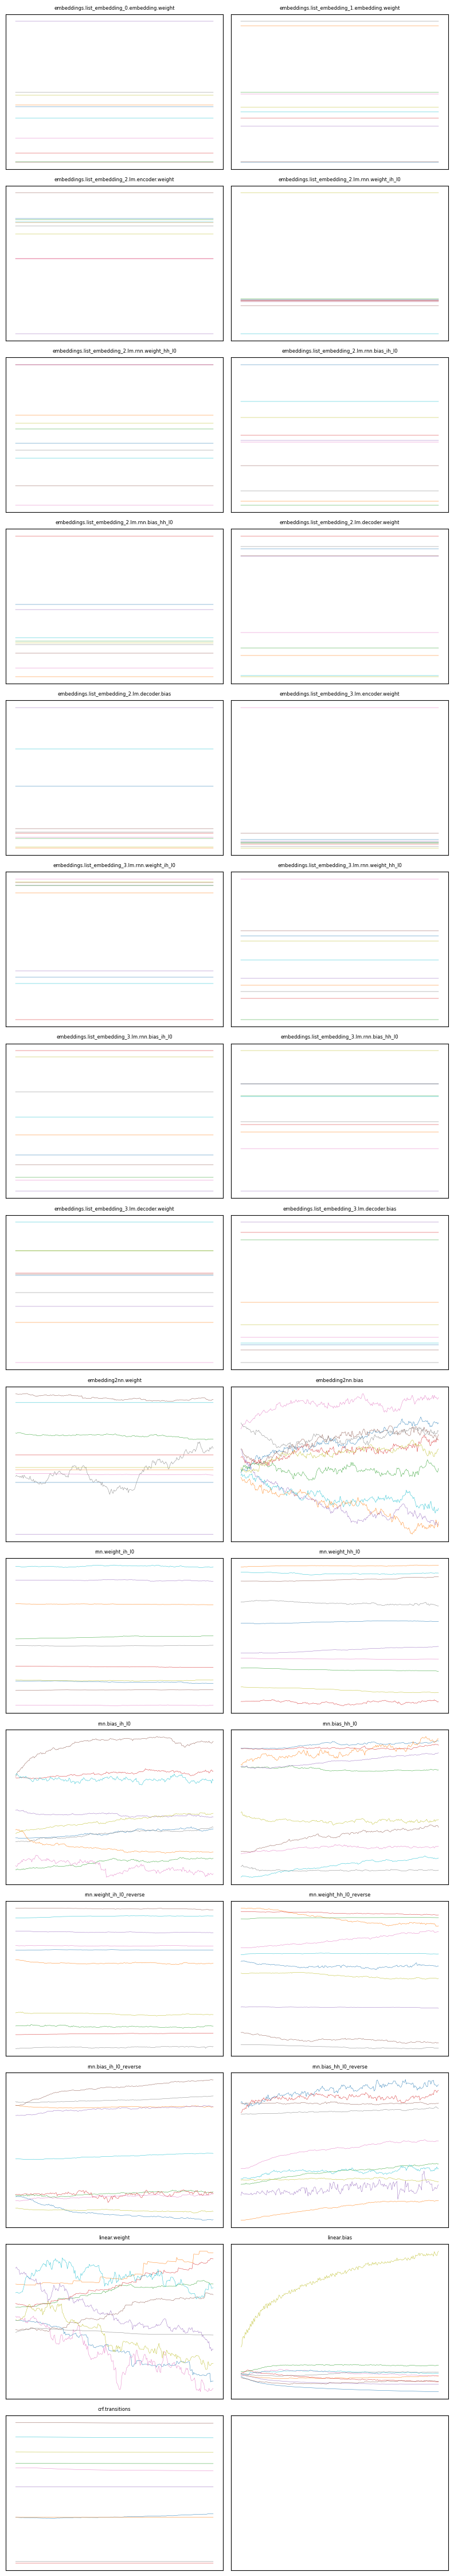

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')